In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# STRATEGY SET UP
txCost = 0
ts = pd.read_csv('data/WallSt-hourly-all.txt', index_col=0, parse_dates=[[0, 1]], dayfirst=True )
ts = ts["2016-07-06":]

import pytz
ts.index = ts.index.tz_localize(pytz.timezone('UTC'), ambiguous='NaT').tz_convert('EST').tz_localize(None)

# Resample into hourly data
#order = ts.columns
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]


# Remove hours we are not interested in
#ts[(ts.index.hour > 19) | (ts.index.hour < 12)] = np.nan

# Resample into Business Days
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]
#ts

In [2]:
R = np.array([[1,0,3],[3,0,0],[4,1,2],[3,3,3]]).T
F = np.array([1,2,3])
iterables = [np.array(["one", "two"]), np.array(["this","that"])]
C = pd.MultiIndex.from_product(iterables)
R = pd.DataFrame(R, columns=C)
np.array([[1,1,1],[2,2,2]]).T
#R["three"] = np.array([[1,1,1],[2,2,2]]).T



array([[1, 2],
       [1, 2],
       [1, 2]])

In [41]:
!ls ../..
!pip install --upgrade ../../tradeframework

#import tradeframework
from tradeframework.api import Derivative, Portfolio, Optimizer, Model, TradeEnvironment, TradeEngine, AssetInfo
from tradeframework.environments import SandboxEnvironment, SandboxContext, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum

fintools  mypkgs.pth  tradeframework
Processing /home/cwilkin/Cloud/Dropbox/Python/mypkgs/tradeframework
  Found existing installation: tradeframework 1.0.0
    Uninstalling tradeframework-1.0.0:
      Successfully uninstalled tradeframework-1.0.0
  Running setup.py install for tradeframework ... - \ | done


In [42]:
env = SandboxEnvironment("TradeFair")
context = {}

#opt = env.createOptimizer("KellyOptimizer", "KellyOpt", opts={"window":None})
opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")
p = env.createPortfolio("MyPortfolio", optimizer=opt)

#p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))
p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))
threshold = 0
#p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML1", args=('cred/MIOapi_cred.json', 'DOW', '0aaf64aa-95bc-476b-9ac0-28891e40892a', threshold)))
#p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML2", args=('cred/MIOapi_cred.json', 'DOW', 'a80a294f-12f8-4b27-8eac-9aad9a53ec8b', threshold)))
#p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML3", args=('cred/MIOapi_cred.json', 'DOW', '28da8212-32f3-4680-bacd-0cd1c51bfe02', threshold)))
#p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML4", args=('cred/MIOapi_cred.json', 'DOW', '53ca0624-21e4-48d4-b2b8-cee5b381ff2b', threshold)))
#p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML5", args=('cred/MIOapi_cred.json', 'DOW', '6682f56b-a2e4-4e6d-92c5-9c11913f8b35', threshold)))
#p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML6", args=('cred/MIOapi_cred.json', 'DOW', 'fdbe5895-0327-49d9-83e9-2246dbe1858b', threshold)))

# Feed data into the portfolio

#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
dInfo = env.handleData(context, AssetInfo("DOW", ts))

#env.placeOrders(context, allocations, ts)


In [43]:
np.prod(context["TradeFair_Portfolio"]["MyPortfolio"]["D2-BuyAndHold"]["debug"].returns+1, axis=1)[:10]-1
context["TradeFair_Portfolio"]["MyPortfolio"]["D2-BuyAndHold"]["debug"].allocations[:10]

,bar,gap
Date_Time,,
2016-07-05 19:00:00,0.0000560318,0.0000560318
2016-07-05 20:00:00,0.0000560318,0.0000560318
2016-07-05 21:00:00,0.0000560318,0.0000560318
2016-07-05 22:00:00,0.0000560318,0.0000560318
2016-07-05 23:00:00,0.0000560318,0.0000560318
2016-07-06 00:00:00,0.0000560318,0.0000560318
2016-07-06 01:00:00,0.0000560318,0.0000560318
2016-07-06 02:00:00,0.0000560318,0.0000560318
2016-07-06 03:00:00,0.0000560318,0.0000560318


In [44]:
dInfo.allocations[:10]

,bar,gap
Date_Time,,
2016-07-05 19:00:00,0.0000560318,0.0000560318
2016-07-05 20:00:00,0.0000560318,0.0000560318
2016-07-05 21:00:00,0.0000560318,0.0000560318
2016-07-05 22:00:00,0.0000560318,0.0000560318
2016-07-05 23:00:00,0.0000560318,0.0000560318
2016-07-06 00:00:00,0.0000560318,0.0000560318
2016-07-06 01:00:00,0.0000560318,0.0000560318
2016-07-06 02:00:00,0.0000560318,0.0000560318
2016-07-06 03:00:00,0.0000560318,0.0000560318


In [45]:
a = np.diff(ts["Open"].values) / ts["Open"][:-1]
a[:10]

Date_Time
2016-07-05 19:00:00   -0.0007564297
2016-07-05 20:00:00   -0.0008971879
2016-07-05 21:00:00   -0.0025817314
2016-07-05 22:00:00   -0.0005064288
2016-07-05 23:00:00    0.0007881773
2016-07-06 00:00:00    0.0000843811
2016-07-06 01:00:00    0.0022218472
2016-07-06 02:00:00   -0.0016276133
2016-07-06 03:00:00    0.0010681058
2016-07-06 04:00:00   -0.0014319809
Name: Open, dtype: float64

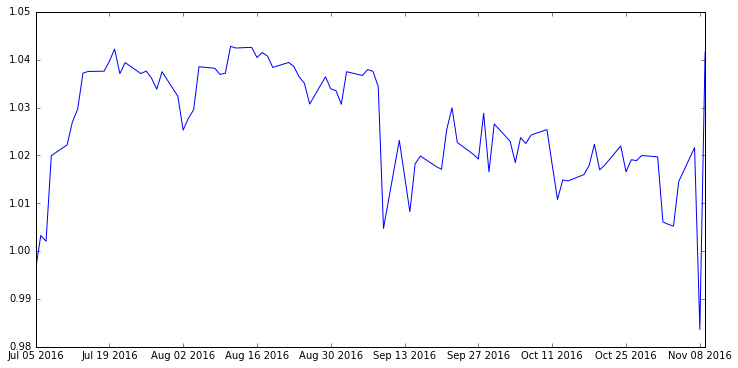

In [46]:
from tradeframework.api import TradeEngine
ret = TradeEngine.getPeriodReturns(dInfo.returns) + 1
#ret = ret.prod(axis=1)

pnl = np.cumprod(ret.resample('B').agg({'Sandbox Engine': 'prod'}))

plt.plot(pnl)
plt.show() 

#np.exp(np.log(ret).resample('B').agg({'Sandbox Engine': 'sum'}))-1

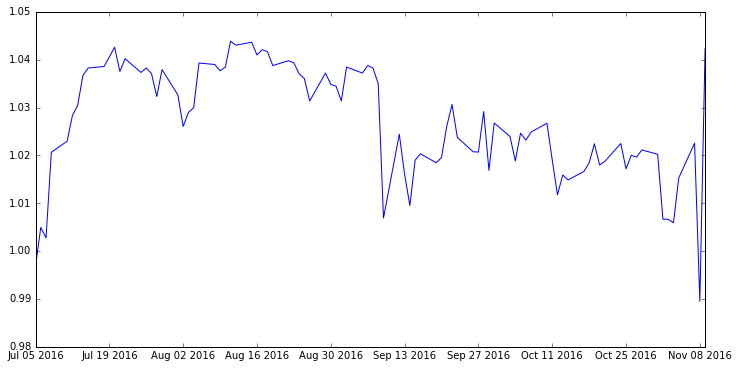

In [25]:
a = np.diff(ts["Close"].values) / ts["Close"][:-1]
a = a + 1
pnl = np.cumprod(a.resample('B').agg({'Sandbox Engine': 'prod'}))
plt.plot(pnl)
plt.show() 

